In [1]:
from fbprophet import Prophet
from datetime import date
import pandas as pd
from sklearn.metrics import mean_absolute_error

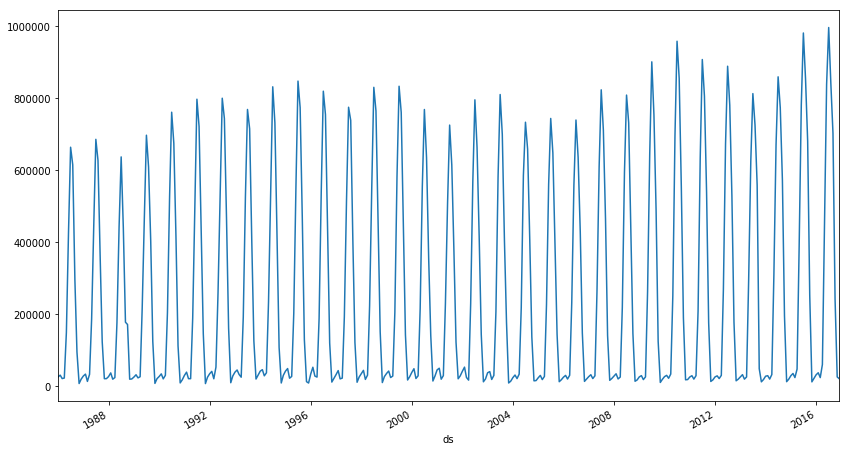

In [2]:
%run setup_workspace.ipynb

In [3]:
data = yellow_stone
data.dropna(inplace=True)

# Creating a Prophet model

## 1. Train-test-split

In [4]:
split_date = pd.to_datetime(date(2016,1,1))
min_date = pd.to_datetime(date(2000,1,1))
max_date = None

train = data[data.ds < split_date]
if min_date is not None:
    train = train[train['ds'] > min_date]
test = data[data.ds > split_date]

if max_date is not None:
    test = test[test['ds'] < max_date]

## 2. Model training

In [5]:
train.columns

Index(['y', 'LowestTemperature(F)', 'HighestTemperature(F)',
       'WarmestMinimumTemperature(F)', 'ColdestMaximumTemperature(F)',
       'AverageMinimumTemperature(F)', 'AverageMaximumTemperature(F)',
       'MeanTemperature(F)', 'TotalPrecipitation(In)', 'TotalSnowfall(In)',
       'Max 24hrPrecipitation(In)', 'Max 24hrSnowfall(In)', 'Year/Month/Day',
       '3month Percent Change Airfare Costs',
       '3month Percent Change Food Away From Home Costs',
       '3month Percent Change Gasoline Costs',
       '3month Percent Change Jet Fuel Costs', 'Consumer Price Index',
       'Consumer Sentiment Index', 'Unemployment Rate', 'ds'],
      dtype='object')

In [13]:
?Prophet

In [7]:
# 100,15%
# model = Prophet() 
# 50,06%
model = Prophet(yearly_seasonality=5)  # fourier order
model.add_seasonality("season", period=365/4, fourier_order=3)
model.add_regressor("TotalPrecipitation(In)", mode='multiplicative')
model.add_regressor("HighestTemperature(F)", mode='multiplicative')
model.add_regressor("LowestTemperature(F)", mode='multiplicative')
model.fit(train)

/home/veronika/.virtualenvs/idsc-2019/lib/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## 3. Forecast

In [8]:
# test = train
future = test#[['ds']]
forecast = model.predict(future)

## 4. Evaluation

In [9]:
error = mean_absolute_percentage_error(test[['y']].values,forecast[['yhat']].values)
print('MAPE:%0.2f%%'%error)

MAPE:50.06%


In [10]:
error = mean_absolute_error(test[['y']].values, forecast[['yhat']].values)
print('MAPE:%0.2f'%error)

MAPE:60750.98


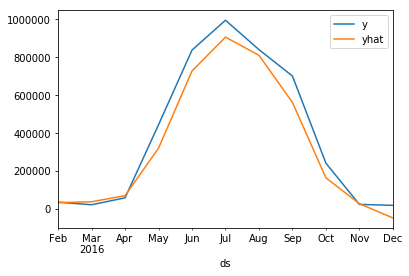

In [11]:
tmp = test.copy().reset_index(drop=True)
tmp = pd.merge(tmp, forecast[['ds','yhat']], on='ds')
tmp.set_index('ds', drop=True)[['y','yhat']].plot()

## 5. Decomposition

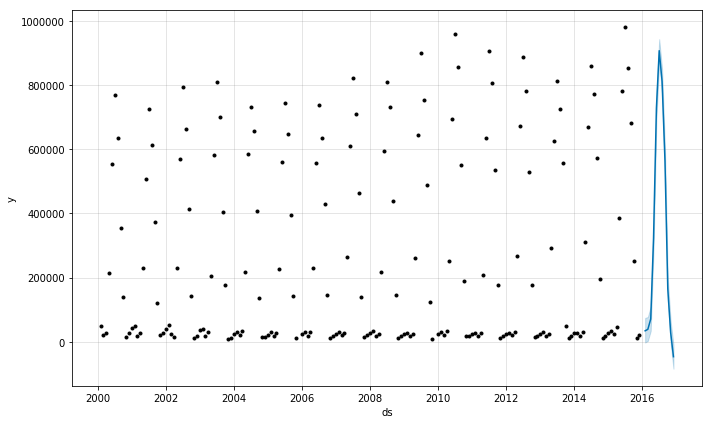

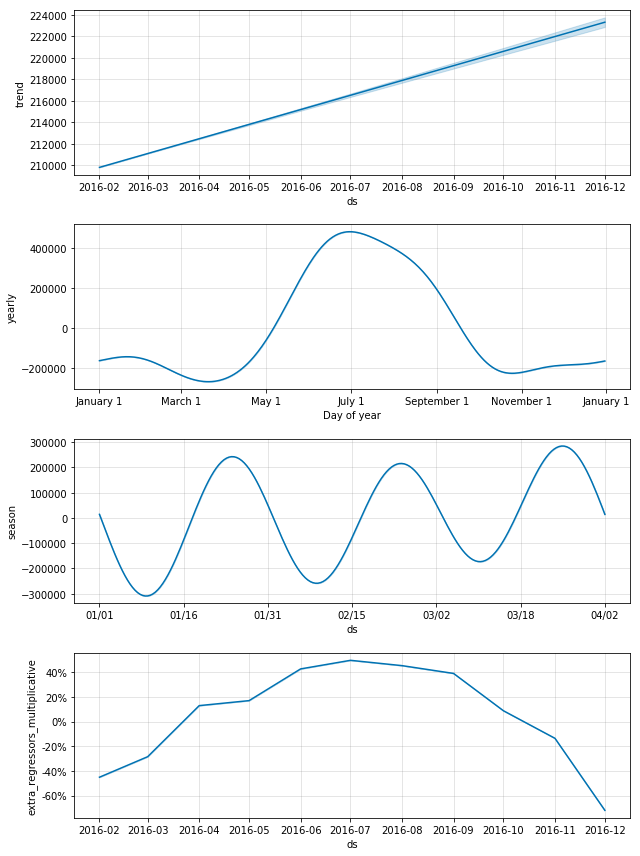

In [12]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)